<a href="https://colab.research.google.com/github/eadewusic/Formative-2_Data-Preprocessing/blob/main/Part_1_Data_Augmentation_on_CSV_Files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Part 1: Data Augmentation on CSV Files

In [22]:
#import necessary package

import pandas as pd
from sklearn.impute import KNNImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Load the Dataset

In [3]:
path = "/content/data/customer_transactions.csv"
df = pd.read_csv(path)

# Print some part of the dataset
df.head()

,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
0,151,1001,408,2024-01-01,Sports,2.3
1,192,1002,332,2024-01-02,Electronics,4.2
2,114,1003,442,2024-01-03,Electronics,2.1
3,171,1004,256,2024-01-04,Clothing,2.8
4,160,1005,64,2024-01-05,Clothing,1.3


### Data Cleaning & Handling Missing Values

In [4]:
# Display basic info to check for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id_legacy  150 non-null    int64  
 1   transaction_id      150 non-null    int64  
 2   purchase_amount     150 non-null    int64  
 3   purchase_date       150 non-null    object 
 4   product_category    150 non-null    object 
 5   customer_rating     140 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 7.2+ KB


customer_rating column has 140 non-null values (meaning 10 missing values)

### Handle Missing Values

- Mean, Median, Mode Imputation

In [5]:
df_mean = df.copy()  # make a copy to compare later
mean_value = df['customer_rating'].mean()

df_mean['customer_rating'] = df_mean['customer_rating'].fillna(mean_value)

# Verify that there are no more missing values
print("Missing values after Mean Imputation:", df_mean['customer_rating'].isnull().sum())

# View the first 5 rows
print(df_mean.head())

Missing values after Mean Imputation: 0
   customer_id_legacy  transaction_id  purchase_amount purchase_date  \
0                 151            1001              408    2024-01-01   
1                 192            1002              332    2024-01-02   
2                 114            1003              442    2024-01-03   
3                 171            1004              256    2024-01-04   
4                 160            1005               64    2024-01-05   

  product_category  customer_rating  
0           Sports              2.3  
1      Electronics              4.2  
2      Electronics              2.1  
3         Clothing              2.8  
4         Clothing              1.3  


In [6]:
df_median = df.copy()
median_value = df['customer_rating'].median()

df_median['customer_rating'] = df_median['customer_rating'].fillna(median_value)

print("Missing values after Median Imputation:", df_median['customer_rating'].isnull().sum())
print(df_median.head())

Missing values after Median Imputation: 0
   customer_id_legacy  transaction_id  purchase_amount purchase_date  \
0                 151            1001              408    2024-01-01   
1                 192            1002              332    2024-01-02   
2                 114            1003              442    2024-01-03   
3                 171            1004              256    2024-01-04   
4                 160            1005               64    2024-01-05   

  product_category  customer_rating  
0           Sports              2.3  
1      Electronics              4.2  
2      Electronics              2.1  
3         Clothing              2.8  
4         Clothing              1.3  


In [7]:
df_mode = df.copy()
mode_value = df['customer_rating'].mode()[0]  # mode() returns a Series, take the first mode

df_mode['customer_rating'] = df_mode['customer_rating'].fillna(mode_value)

print("Missing values after Mode Imputation:", df_mode['customer_rating'].isnull().sum())
print(df_mode.head())

Missing values after Mode Imputation: 0
   customer_id_legacy  transaction_id  purchase_amount purchase_date  \
0                 151            1001              408    2024-01-01   
1                 192            1002              332    2024-01-02   
2                 114            1003              442    2024-01-03   
3                 171            1004              256    2024-01-04   
4                 160            1005               64    2024-01-05   

  product_category  customer_rating  
0           Sports              2.3  
1      Electronics              4.2  
2      Electronics              2.1  
3         Clothing              2.8  
4         Clothing              1.3  


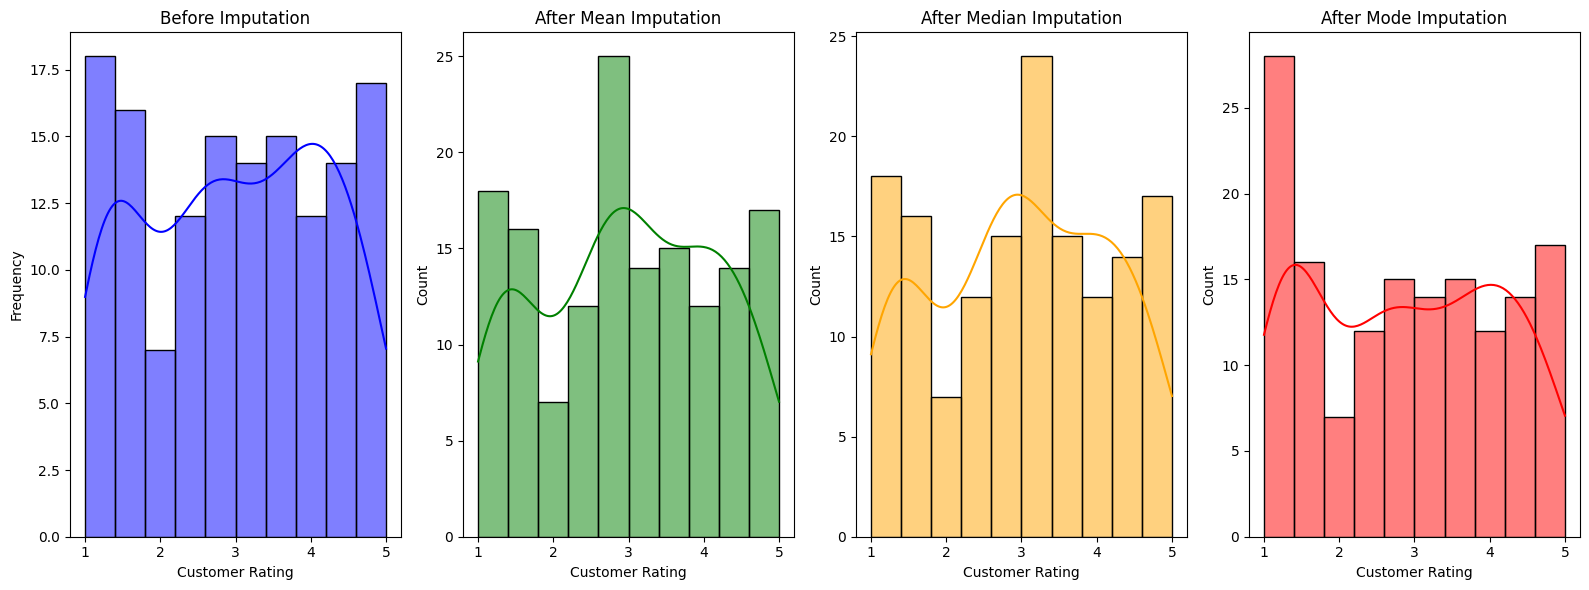

In [13]:
plt.figure(figsize=(16, 6))

# Before Imputation
plt.subplot(1, 4, 1)
sns.histplot(df['customer_rating'], bins=10, kde=True, color='blue')
plt.title("Before Imputation")
plt.xlabel("Customer Rating")
plt.ylabel("Frequency")

# After Mean Imputation
plt.subplot(1, 4, 2)
sns.histplot(df_mean['customer_rating'], bins=10, kde=True, color='green')
plt.title("After Mean Imputation")
plt.xlabel("Customer Rating")

# After Median Imputation
plt.subplot(1, 4, 3)
sns.histplot(df_median['customer_rating'], bins=10, kde=True, color='orange')
plt.title("After Median Imputation")
plt.xlabel("Customer Rating")

# After Mode Imputation
plt.subplot(1, 4, 4)
sns.histplot(df_mode['customer_rating'], bins=10, kde=True, color='red')
plt.title("After Mode Imputation")
plt.xlabel("Customer Rating")

plt.tight_layout()
plt.show()

- Predictive Modeling to Fill Missing Data (using KNNImputer)

In [9]:
# Select relevant columns (drop non-numeric if necessary)
df_knn = df.copy()

imputer = KNNImputer(n_neighbors=3)

# Use numeric columns for imputation
df_knn[['purchase_amount', 'customer_rating']] = imputer.fit_transform(df_knn[['purchase_amount', 'customer_rating']])

print("Missing values after KNN Imputer:", df_knn['customer_rating'].isnull().sum())
print(df_knn.head())

Missing values after KNN Imputer: 0
   customer_id_legacy  transaction_id  purchase_amount purchase_date  \
0                 151            1001            408.0    2024-01-01   
1                 192            1002            332.0    2024-01-02   
2                 114            1003            442.0    2024-01-03   
3                 171            1004            256.0    2024-01-04   
4                 160            1005             64.0    2024-01-05   

  product_category  customer_rating  
0           Sports              2.3  
1      Electronics              4.2  
2      Electronics              2.1  
3         Clothing              2.8  
4         Clothing              1.3  


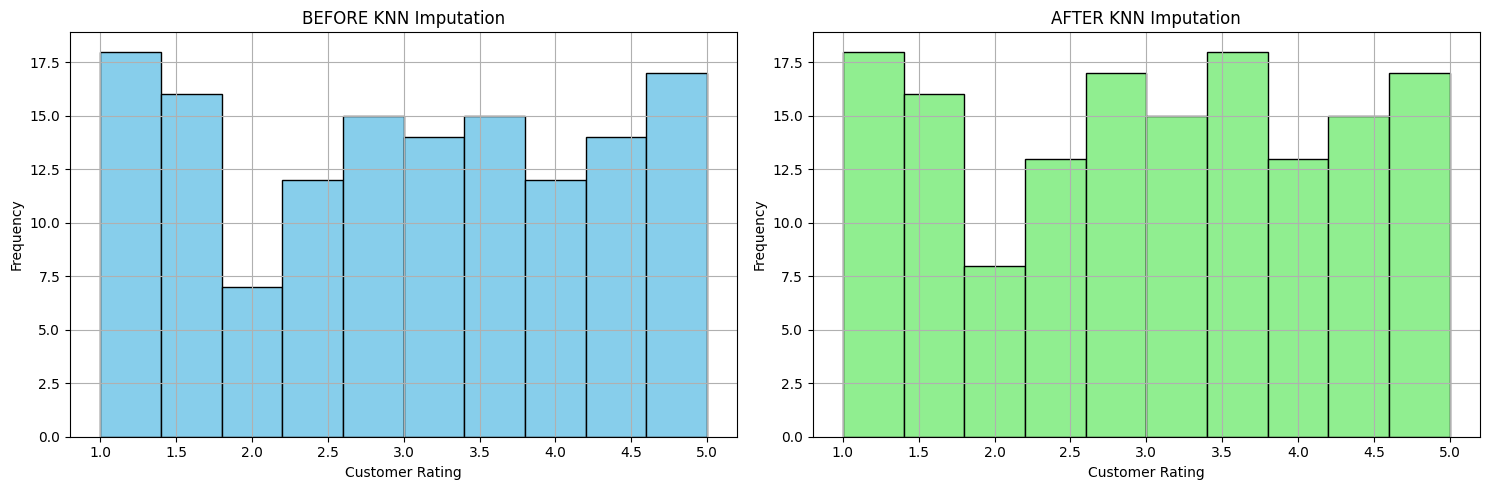

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Before
df['customer_rating'].hist(ax=axes[0], bins=10, color='skyblue', edgecolor='black')
axes[0].set_title("BEFORE KNN Imputation")
axes[0].set_xlabel("Customer Rating")
axes[0].set_ylabel("Frequency")

# After
df_knn['customer_rating'].hist(ax=axes[1], bins=10, color='lightgreen', edgecolor='black')
axes[1].set_title("AFTER KNN Imputation")
axes[1].set_xlabel("Customer Rating")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### Data Augmentation Strategies

- Apply Random Noise to Numerical Transaction Values: to slightly perturb `purchase_amount` and `customer_rating` to simulate variation

In [24]:
# Make a copy of the cleaned dataframe
df_augmented = df.copy()

# Set random seed for reproducibility
np.random.seed(42)

# Add random noise to 'purchase_amount'
noise_factor = 0.05
df_augmented['purchase_amount'] = df_augmented['purchase_amount'] * (
    1 + np.random.uniform(-noise_factor, noise_factor, df_augmented.shape[0])
)

# Add noise to 'customer_rating' (small noise within 0.1 range)
df_augmented['customer_rating'] = df_augmented['customer_rating'] + np.random.normal(0, 0.1, df_augmented.shape[0])

# Clip ratings to stay within valid range (e.g., 1 to 5)
df_augmented['customer_rating'] = df_augmented['customer_rating'].clip(1, 5)

# Preview
df_augmented.head()

,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
0,151,1001,402.881237,2024-01-01,Sports,2.280764
1,192,1002,346.963715,2024-01-02,Electronics,4.230155
2,114,1003,452.254132,2024-01-03,Electronics,2.096529
3,171,1004,258.525657,2024-01-04,Clothing,2.683132
4,160,1005,61.798519,2024-01-05,Clothing,1.414282


- Use SMOTE to Balance the Dataset: by creating more data points if the dataset is imbalanced on a categorical feature like `product_category`

SMOTE works only on numeric features, so convert categories to numbers first

In [25]:
# Define the OneHotEncoder for 'product_category'
column_transformer = ColumnTransformer(
    transformers=[
        ('product_category', OneHotEncoder(), ['product_category'])  # Apply to 'product_category'
    ],
    remainder='passthrough'  # Keep the other columns as they are
)

# Apply the transformation to X
X_encoded = column_transformer.fit_transform(df_mean[['purchase_amount', 'customer_rating', 'product_category']])

# Convert the encoded data back to a DataFrame
X_encoded = pd.DataFrame(X_encoded, columns=column_transformer.get_feature_names_out())

# apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y_encoded)

# Create a new DataFrame with the resampled data
df_smote = pd.DataFrame(X_resampled, columns=column_transformer.get_feature_names_out())
df_smote['product_category'] = le.inverse_transform(y_resampled)

# View the first 5 rows of the augmented data
df_smote.head()

,product_category__product_category_Books,product_category__product_category_Clothing,product_category__product_category_Electronics,product_category__product_category_Groceries,product_category__product_category_Sports,remainder__purchase_amount,remainder__customer_rating,product_category
0,0.0,0.0,0.0,0.0,1.0,408.0,2.3,Sports
1,0.0,0.0,1.0,0.0,0.0,332.0,4.2,Electronics
2,0.0,0.0,1.0,0.0,0.0,442.0,2.1,Electronics
3,0.0,1.0,0.0,0.0,0.0,256.0,2.8,Clothing
4,0.0,1.0,0.0,0.0,0.0,64.0,1.3,Clothing


In [29]:
print(df_smote.columns)

Index(['remainder__purchase_amount', 'remainder__customer_rating',
       'product_category'],
      dtype='object')


### Feature Value Transformation

- apply log transformation to skewed data like `purchase_amount` and `customer_rating`

In [31]:
df_smote['log_purchase_amount'] = np.log1p(df_smote['remainder__purchase_amount'])  # log1p is used to handle zeros
df_smote['log_customer_rating'] = np.log1p(df_smote['remainder__customer_rating'])  # log1p handles zero values

# View the first few rows to verify the log-transformed columns
df_smote[['remainder__purchase_amount', 'log_purchase_amount', 'remainder__customer_rating', 'log_customer_rating']].head()

,remainder__purchase_amount,log_purchase_amount,remainder__customer_rating,log_customer_rating
0,408.0,6.013715,2.3,1.193922
1,332.0,5.808142,4.2,1.648659
2,442.0,6.093570,2.1,1.131402
3,256.0,5.549076,2.8,1.335001
4,64.0,4.174387,1.3,0.832909


### Data Expansion

- Generate new synthetic transactions based on existing customer behaviors

In [32]:
# Generate synthetic transactions by perturbing existing ones with random noise
def generate_synthetic_data(df, num_synthetic=100):
    # Randomly sample existing rows
    synthetic_data = df.sample(n=num_synthetic, replace=True)

    # Add slight random noise to the purchase amount and customer rating
    noise_purchase = np.random.normal(0, 0.1, size=synthetic_data.shape[0])
    noise_rating = np.random.normal(0, 0.1, size=synthetic_data.shape[0])

    # Add noise to the columns
    synthetic_data['purchase_amount'] += noise_purchase
    synthetic_data['customer_rating'] += noise_rating

    return synthetic_data

# Generate synthetic data - 100 new synthetic transactions
num_synthetic = 100
synthetic_df = generate_synthetic_data(df, num_synthetic)

# Combine the synthetic data with the original data
augmented_df = pd.concat([df, synthetic_df], ignore_index=True)

# Check the augmented data
print(augmented_df.head())

   customer_id_legacy  transaction_id  purchase_amount purchase_date  \
0                 151            1001            408.0    2024-01-01   
1                 192            1002            332.0    2024-01-02   
2                 114            1003            442.0    2024-01-03   
3                 171            1004            256.0    2024-01-04   
4                 160            1005             64.0    2024-01-05   

  product_category  customer_rating  
0           Sports              2.3  
1      Electronics              4.2  
2      Electronics              2.1  
3         Clothing              2.8  
4         Clothing              1.3  


### Export the Augmented Data

In [35]:
# Export the augmented DataFrame to a CSV file
augmented_df.to_csv('data/customer_transactions_augmented.csv', index=False)

# Confirm the file has been saved
print("Augmented data saved as 'customer_transactions_augmented.csv'")

Augmented data saved as 'customer_transactions_augmented.csv'
